## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

What is your research question? What problem is it that you are trying to solve?

Customer churn is the problem for me and I want to built a system that can predict the churn of customer so that by providing apraisal I can kept the customer.

### b) Defining the Metric for Success

What will convince you that your project has succeeded?

If the model will perform well on real data and its accuracy will be accepatble then this will be the success of project.

### c) Understanding the Context 

The background information surrounding the problem or research question.

Customer churn refers to when a customer ceases his or her relationship with a company. Online businesses typically treat a customer as churned once a particular amount of time has elapsed since the customer's last interaction with the site or service. The full cost of churn includes both lost revenue and the marketing costs involved with replacing those customers with new ones. Reducing churn is a key business goal of every online business. So, to reduce the cost we need such a system.

### d) Recording the Experimental Design

The steps you will take from the beginning to the end of this project.
- Data Exploration
- Data Cleaning
- Data Analysis (Univariate and Bivariate)
- Data Preparation
- Data Modeling
- Model Evaluation

### e) Data Relevance

Is the provided data relevant to the problem or research question?

It is related to the problem. And using that data I can made a system for predicting churn.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [ ]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

In [ ]:
# load and preview dataset
df = pd.read_csv('call-center-data-QueryResult.csv')
df.sample(3)

,recordid,customer_id,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes_2,total_intl_calls_2,total_intl_charge,number_customer_service_calls,churn
7286,7287,14123863.0,118,415,False,10.4,7,True,42,148.7,105,25.28,167.3,105,14.22,270.6,105,12.18,10.4,7,2.81,0,False
8867,8868,28028454.0,67,510,False,9.2,10,False,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,False
7644,7645,32766305.0,76,415,False,12.4,2,False,0,179.2,85,30.46,222.9,66,18.95,188.2,113,8.47,12.4,2,3.35,0,False


In [ ]:
# load glossary
glossary = pd.read_csv('classification_analysis_glossary.csv',header = None)
glossary

,0
0,account_length - Age of account in months.
1,customer_id - Enterprise ID of the customer.
2,area_code - Area code.
3,international_plan - Rather or not the customer has an international calling plan.
4,voice_mail_plan - Rather or not the customer has a voice mail plan.
5,number_vmail_messages - Number of VM messages customer currently has on the server.
6,total_day_minutes - Customers total usage of day minutes in plan.
7,total_day_calls - Total number of calls customer has made during the day.
8,total_day_charge - How much the customer has been charged for day minutes.
9,total_eve_minutes - Total number of calls customer has made during the evening.


In [ ]:
# check dataset shape
df.shape

(12892, 23)

Our dataset has 12,892 records and 23 variables.

We will drop 'recordid' and 'customer_id' since we have dont need them and they would interfere with our analysis.

In [ ]:
df.drop(columns = ['recordid', 'customer_id'], inplace = True)

In [ ]:
# preview variable datatypes
df.dtypes

account_length                     int64
area_code                          int64
international_plan                  bool
total_intl_minutes               float64
total_intl_calls                   int64
voice_mail_plan                     bool
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes_2             float64
total_intl_calls_2                 int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               bool
dtype: object

With the exception of the 'international_plan', 'voice_mail_plan', and 'churn' variables which are boolean, this dataset is numerical.

In [ ]:
# check for duplicates
df.duplicated().sum()

7892

7,892 duplicated records are found. We will drop them.

In [ ]:
df = df.drop_duplicates()
df.shape

(5000, 21)

In [ ]:
# check for missing values
df.isna().sum()

account_length                   0
area_code                        0
international_plan               0
total_intl_minutes               0
total_intl_calls                 0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes_2             0
total_intl_calls_2               0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

We can confirm that there are no missing values in this dataset.

There appears to be 2 duplicated columns: 'total_intl_minutes' and 'total_intl_minutes_2', and 'total_intl_calls' and 'total_intl_calls_2'. Let's preview them:

In [ ]:
# previewing the possibly duplicated columns
df[['total_intl_minutes', 'total_intl_calls', 'total_intl_minutes_2', 'total_intl_calls_2']]

,total_intl_minutes,total_intl_calls,total_intl_minutes_2,total_intl_calls_2
0,10.6,3,10.6,3
1,9.5,7,9.5,7
2,13.7,6,13.7,6
3,15.7,2,15.7,2
4,7.7,4,7.7,4
...,...,...,...,...
4995,9.9,6,9.9,6
4996,9.6,4,9.6,4
4997,14.1,6,14.1,6
4998,5.0,10,5.0,10


In [ ]:
df = df.drop(columns = ['total_intl_minutes_2', 'total_intl_calls_2'])
df.shape

(5000, 19)

Another issue noted is that where there are records under 'total_intl_minutes', 'total_int_calls', and 'total_intl_charge' when 'international_plan' is False. This may be an error.

In [ ]:
df[(df['international_plan'] == False) & ((df['total_intl_minutes'] > 0) | (df['total_intl_calls'] > 0) |
                                         df['total_intl_charge'] > 0)]

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,False,10.6,3,False,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,False
1,137,510,False,9.5,7,False,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,False
2,103,408,False,13.7,6,True,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,False
3,99,415,False,15.7,2,False,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,False
4,108,415,False,7.7,4,False,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,79,415,False,11.8,5,False,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,3.19,2,False
4995,192,415,False,9.9,6,True,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,2.67,2,False
4996,68,415,False,9.6,4,False,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,2.59,3,False
4997,28,510,False,14.1,6,False,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,3.81,2,False


In [ ]:
df.international_plan.value_counts()

False    4527
True      473
Name: international_plan, dtype: int64

Much as we'd like to remove these invalid variables, doing so would result in a huge loss of data. We will therefore leave them as is, but flag them for future work.

We will check to confirm that there are no 'number_vmail_messages' when 'voice_mail_plan' is set to False.

In [ ]:
df[(df['voice_mail_plan'] == False) & (df['number_vmail_messages'] > 0)]

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn


After confirming this, we can now drop the 'voice_mail_plan' column.

In [ ]:
df.drop(columns = ['voice_mail_plan'], inplace = True)

In [ ]:
df.dtypes

account_length                     int64
area_code                          int64
international_plan                  bool
total_intl_minutes               float64
total_intl_calls                   int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               bool
dtype: object

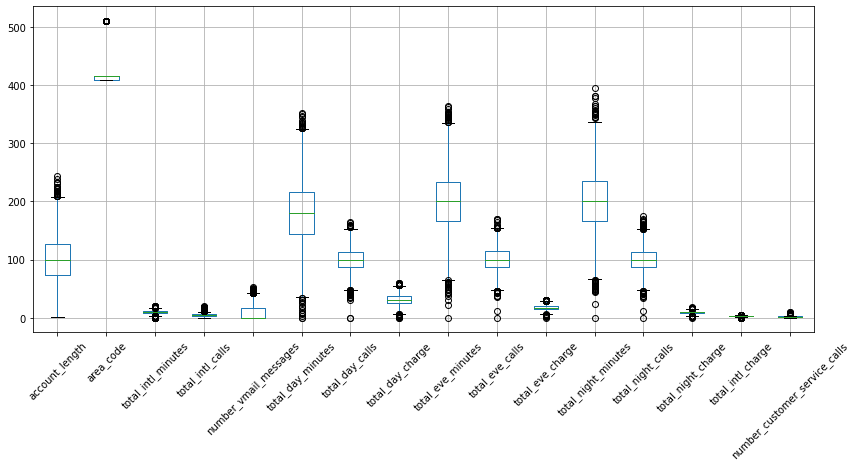

In [ ]:
# looking for outliers
num_cols = df.columns.to_list()
num_cols.remove('international_plan')
num_cols.remove('churn')

plt.figure(figsize = (14, 6))
df.boxplot(num_cols)
plt.xticks(rotation = 45)
plt.show()

We see that all the remaining variables have outliers, which we will not drop.

We now save our clean dataset to a new CSV file.

In [ ]:
# save the data set to a clean CSV file

df.to_csv('call_center_clean.csv', index = False)

df = pd.read_csv('call_center_clean.csv')
df.head()

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,False,10.6,3,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,False
1,137,510,False,9.5,7,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,False
2,103,408,False,13.7,6,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,False
3,99,415,False,15.7,2,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,False
4,108,415,False,7.7,4,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,False


## <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Univariate Analysis

In [ ]:
# get the summary statistics
df.describe()

,account_length,area_code,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,10.261780,4.435200,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,2.771196,1.570400
std,39.69456,42.209182,2.761396,2.456788,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,8.500000,3.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,2.300000,1.000000
50%,100.00000,415.000000,10.300000,4.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,2.780000,1.000000
75%,127.00000,415.000000,12.000000,6.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,3.240000,2.000000
max,243.00000,510.000000,20.000000,20.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,5.400000,9.000000


415    2495
408    1259
510    1246
Name: area_code, dtype: int64


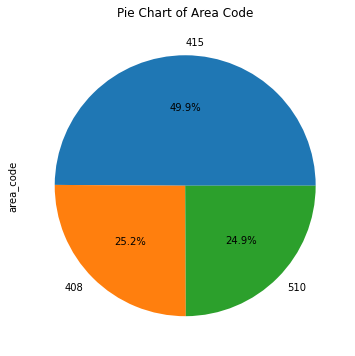

In [ ]:
#we will analyse each variable individually using visualisation techniques
print(df.area_code.value_counts())

plt.figure(figsize = (6, 6))
df.area_code.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Pie Chart of Area Code')
plt.show()

Area Code 415 consists of almost half of the area codes in this dataset. Area Code 510 very slightly outnumbers Area Code 408.

False    4527
True      473
Name: international_plan, dtype: int64


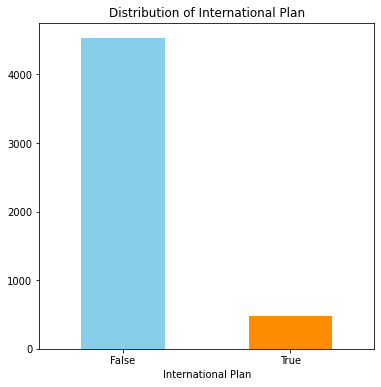

In [ ]:
print(df.international_plan.value_counts())

plt.figure(figsize = (6, 6))
df.international_plan.value_counts().plot(kind = 'bar', rot = 0, color = ['skyblue', 'darkorange'])
plt.title('Distribution of International Plan')
plt.xlabel('International Plan')
plt.show()

Very few of the customers are subscribed to an international plan.

1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: number_customer_service_calls, dtype: int64


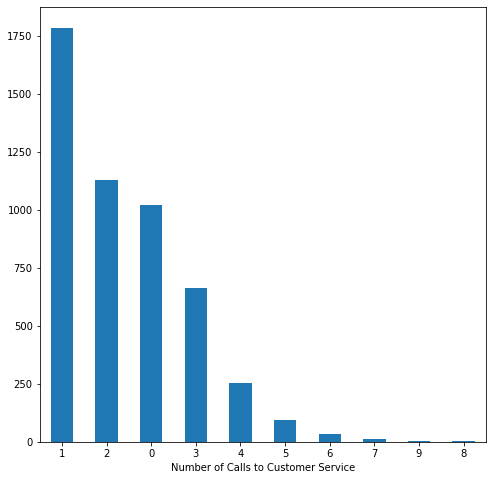

In [ ]:
print(df.number_customer_service_calls.value_counts())

plt.figure(figsize = (8, 8))
df.number_customer_service_calls.value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel("Number of Calls to Customer Service")
plt.show()

Most customers made exactly 1 call to customer service followed by those who made 2 calls, and then those who made 0 calls. Those who made more than 5 calls make up the minority.

False    4293
True      707
Name: churn, dtype: int64


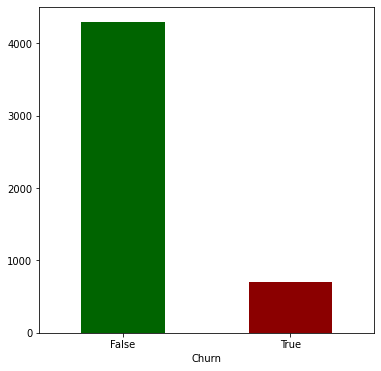

In [ ]:
print(df.churn.value_counts())

plt.figure(figsize = (6, 6))
df.churn.value_counts().plot(kind ='bar', rot = 0, color = ['darkgreen', 'darkred'])
plt.xlabel("Churn")
plt.show()

Majority of the customers in this dataset have not churned, thereby making this dataset very biased.

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

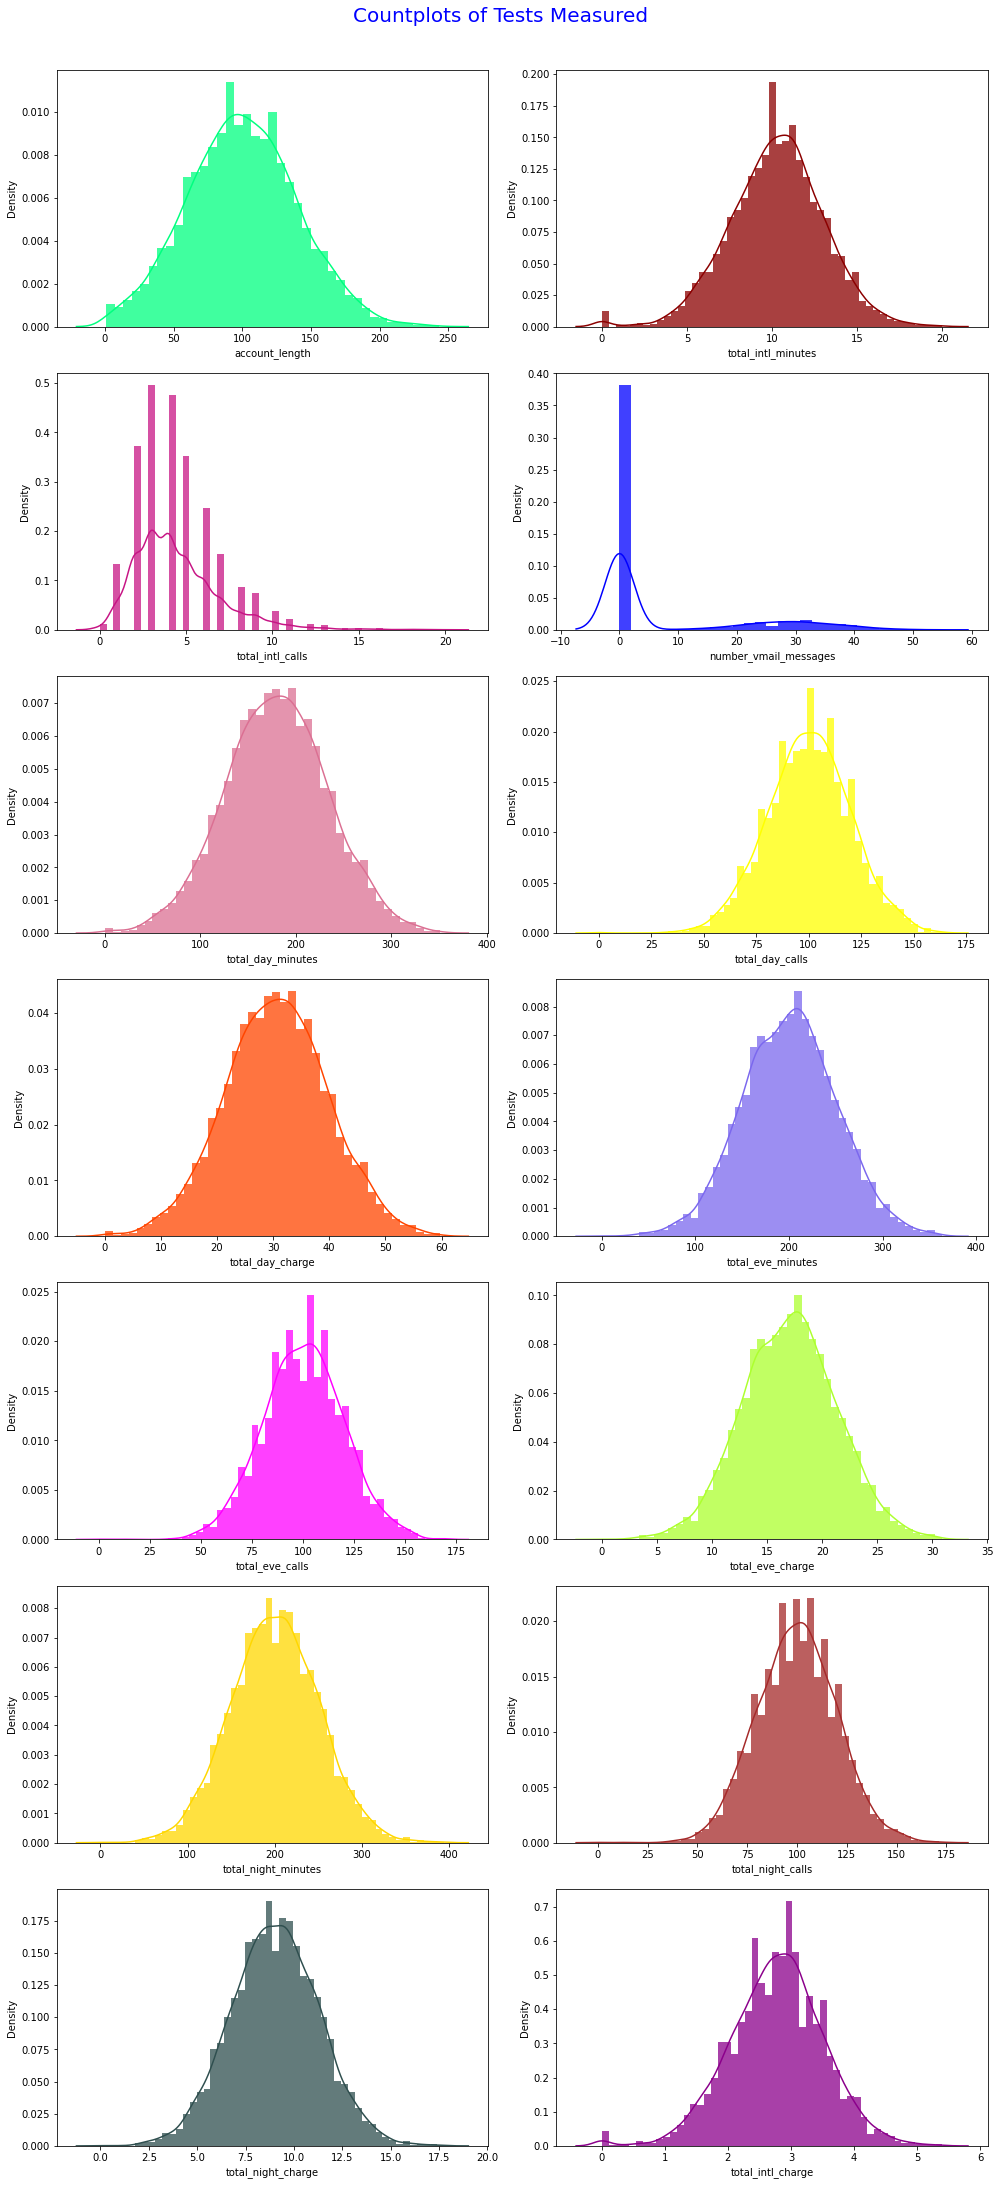

In [ ]:
# plotting the histograms of all our numerical variables against density with the
# exception of 'area_code' and 'number_customer_service_calls'
num_cols.remove('area_code')
num_cols.remove('number_customer_service_calls')

fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (14, 30))
plt.suptitle('Countplots of Tests Measured', fontsize = 20, y = 1.01, color = 'blue')

colors = ['#00FF7F', '#8B0000', '#C71585', '#0000FF', '#DB7093', '#FFFF00', '#FF4500',
          '#7B68EE', '#FF00FF', '#ADFF2F', '#FFD700', '#A52A2A', '#2F4F4F', '#8B008B']
for ax, column, color in zip(axes.flatten(), num_cols, colors):
    sns.distplot(df[column], ax = ax, color = color, hist_kws = dict(alpha = 0.75))
    
plt.tight_layout()

Majority of the numerical variables have normal distributions. Apart from having most of its values in the 0-5 bin, the 'number_vmail_messages' variable appears to be normally distributed. The 'total_intl_calls' variable is skewed to the right and is not continuous.

### 3.2 Bivariate Analysis

We will make 'churn' our target variable and look at how the other variables correlate to it.

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


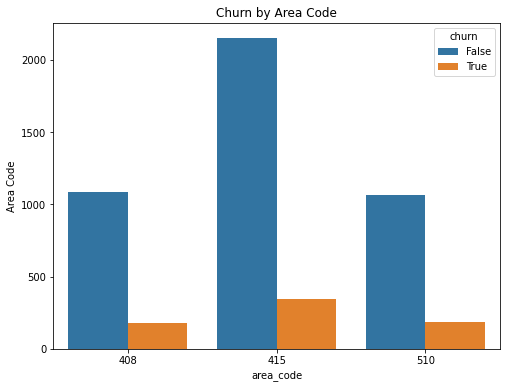

In [ ]:
# churn by area code
plt.figure(figsize = (8, 6))
churn_area_code = sns.countplot('area_code', hue = 'churn', data = df)
churn_area_code.set(title = "Churn by Area Code", ylabel = 'Area Code')
plt.show()

Area code 415 reports the highest churn rates.

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


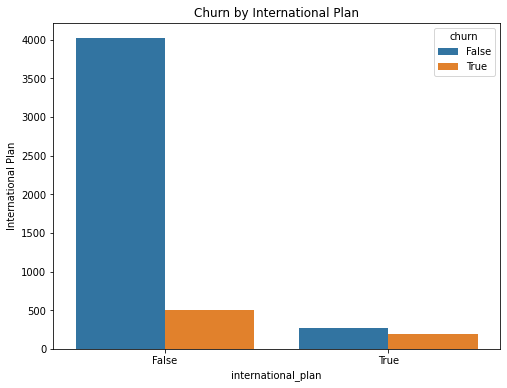

In [ ]:
# churn by international plan
plt.figure(figsize = (8, 6))
churn_area_code = sns.countplot('international_plan', hue = 'churn', data = df)
churn_area_code.set(title = "Churn by International Plan", ylabel = 'International Plan')
plt.show()

Those without international plans churned more than those with international plans.

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


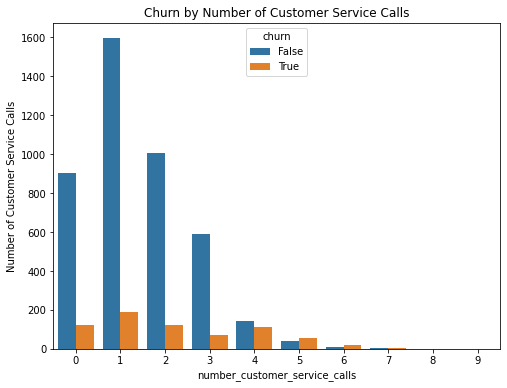

In [ ]:
# churn by number of customer service calls
plt.figure(figsize = (8, 6))
churn_area_code = sns.countplot('number_customer_service_calls', hue = 'churn', data = df)
churn_area_code.set(title = "Churn by Number of Customer Service Calls",
                    ylabel = 'Number of Customer Service Calls')
plt.show()

The interesting thing to note here is that those who made 0 or 2 calls to customer service churned at around the same rate. Similarly, those who made more than 3 calls reported high churn rates.

### 3.3 Feature Engineering & Test for Multicollinearity

Before we can carry out the test for multicollinearity (a requirement for logistic regression), we need to convert the values of 'international_plan' and 'churn' to binary i.e endcode them.

In [ ]:
df['international_plan'] = df['international_plan'].replace({False : 0, True : 1})
df['churn'] = df['churn'].replace({False : 0, True : 1})
df.head()

,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,101,510,0,10.6,3,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,2.86,3,0
1,137,510,0,9.5,7,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,2.57,0,0
2,103,408,0,13.7,6,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,3.70,1,0
3,99,415,0,15.7,2,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,4.24,1,0
4,108,415,0,7.7,4,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,2.08,2,0


,account_length,area_code,international_plan,total_intl_minutes,total_intl_calls,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,-0.018054,0.014681,0.001291,0.014277,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.000656,0.001292,-0.001445,0.021203
area_code,-0.018054,1.000000,0.032107,-0.004154,-0.013623,-0.003399,-0.019118,-0.019314,-0.019119,0.007098,-0.012300,0.007114,0.002084,0.014657,0.002070,-0.004219,0.020921,0.010195
international_plan,0.014681,0.032107,1.000000,0.031799,0.004493,0.011947,0.028138,0.008102,0.028141,0.021235,0.002505,0.021234,-0.026508,0.005623,-0.026510,0.031751,-0.012974,0.259123
total_intl_minutes,0.001291,-0.004154,0.031799,1.000000,0.016791,0.002463,-0.019486,0.013097,-0.019490,0.000137,-0.007458,0.000132,-0.006721,0.000391,-0.006717,0.999993,-0.012122,0.063285
total_intl_calls,0.014277,-0.013623,0.004493,0.016791,1.000000,0.000124,-0.001303,0.010893,-0.001307,0.008388,0.005574,0.008393,-0.017214,-0.000156,-0.017182,0.016900,-0.019147,-0.046893
number_vmail_messages,-0.014575,-0.003399,0.011947,0.002463,0.000124,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.005535,0.002505,-0.007086,-0.097633
total_day_minutes,-0.001017,-0.019118,0.028138,-0.019486,-0.001303,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,0.011783,-0.019415,0.002733,0.207705
total_day_calls,0.028240,-0.019314,0.008102,0.013097,0.010893,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.002802,0.013161,-0.010739,0.016130
total_day_charge,-0.001019,-0.019119,0.028141,-0.019490,-0.001307,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,0.011785,-0.019419,0.002726,0.207700
total_eve_minutes,-0.009591,0.007098,0.021235,0.000137,0.008388,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,-0.016642,0.000159,-0.013823,0.089288


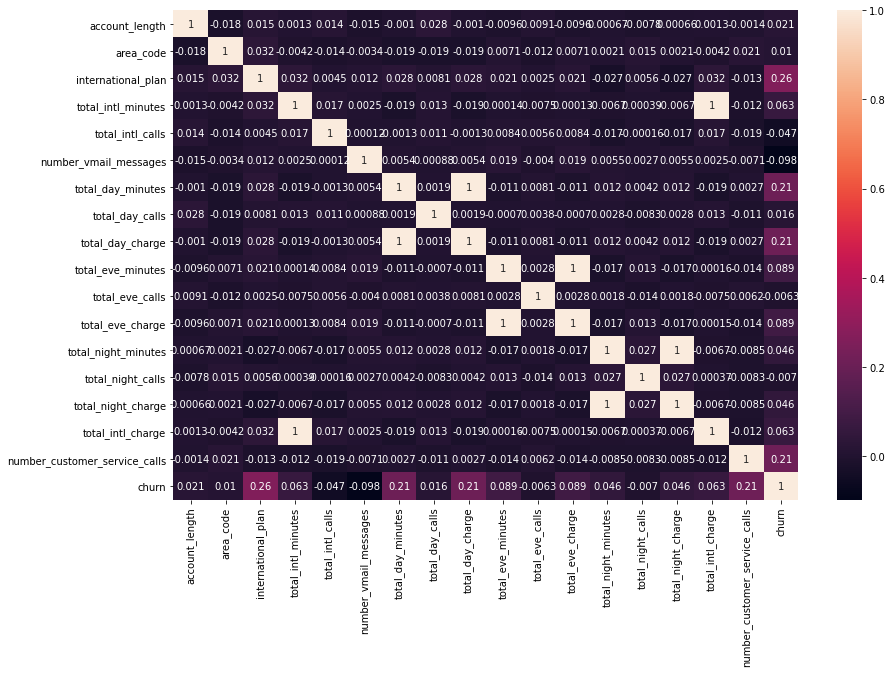

In [ ]:
# checking the correlations between the numerical variables
cor = df.corr()
display(cor)

# plotting the correlations onto a heatmap
plt.figure(figsize=(14, 9))
sns.heatmap(cor, annot=True)
plt.show()

We see some perfect correlations between the following variables:
- 'total_day_minutes' and 'total_day_charge'
- 'total_eve_minutes' and 'total_eve_charge'
- 'total_night_minutes' and 'total_night_charge'
- 'total_intl_minutes' and 'total_intl_charge'

We will drop the minutes.

In [ ]:
# drop the columns with minutes, e.g., 'total_day_minutes', etc.
cols = ["total_day_minutes", "total_eve_minutes", "total_night_minutes", "total_intl_minutes"]
df.drop(cols, axis=1, inplace=True)

,account_length,area_code,international_plan,total_intl_calls,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,-0.018054,0.014681,0.014277,-0.014575,0.028240,-0.001019,0.009143,-0.009587,-0.007825,0.000656,0.001292,-0.001445,0.021203
area_code,-0.018054,1.000000,0.032107,-0.013623,-0.003399,-0.019314,-0.019119,-0.012300,0.007114,0.014657,0.002070,-0.004219,0.020921,0.010195
international_plan,0.014681,0.032107,1.000000,0.004493,0.011947,0.008102,0.028141,0.002505,0.021234,0.005623,-0.026510,0.031751,-0.012974,0.259123
total_intl_calls,0.014277,-0.013623,0.004493,1.000000,0.000124,0.010893,-0.001307,0.005574,0.008393,-0.000156,-0.017182,0.016900,-0.019147,-0.046893
number_vmail_messages,-0.014575,-0.003399,0.011947,0.000124,1.000000,0.000883,0.005377,-0.003954,0.019496,0.002676,0.005535,0.002505,-0.007086,-0.097633
total_day_calls,0.028240,-0.019314,0.008102,0.010893,0.000883,1.000000,0.001936,0.003754,-0.000695,-0.008308,0.002802,0.013161,-0.010739,0.016130
total_day_charge,-0.001019,-0.019119,0.028141,-0.001307,0.005377,0.001936,1.000000,0.008129,-0.010757,0.004235,0.011785,-0.019419,0.002726,0.207700
total_eve_calls,0.009143,-0.012300,0.002505,0.005574,-0.003954,0.003754,0.008129,1.000000,0.002778,-0.013682,0.001799,-0.007507,0.006235,-0.006284
total_eve_charge,-0.009587,0.007114,0.021234,0.008393,0.019496,-0.000695,-0.010757,0.002778,1.000000,0.013422,-0.016652,0.000155,-0.013836,0.089282
total_night_calls,-0.007825,0.014657,0.005623,-0.000156,0.002676,-0.008308,0.004235,-0.013682,0.013422,1.000000,0.026949,0.000368,-0.008283,-0.006986


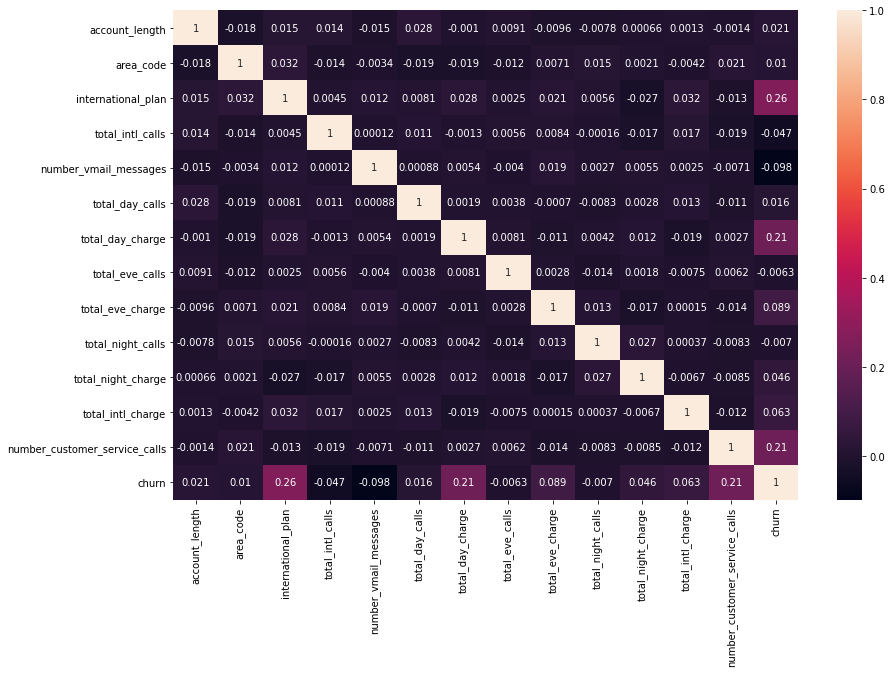

In [ ]:
# checking the correlations between the numerical variables
cor = df.corr()
display(cor)

# plotting the correlations onto a heatmap
plt.figure(figsize=(14, 9))
sns.heatmap(cor, annot=True)
plt.show()

We will then check the Variance Inflation Factor (VIF) scores to ensure there is no high multicollinearity.

In [ ]:
# calculate VIF and plot the heatmap
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop("churn", axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = np.round([variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))], 2)
vif_data

,feature,VIF
0,account_length,7.20
1,area_code,61.28
2,international_plan,1.11
3,total_intl_calls,4.21
4,number_vmail_messages,1.33
5,total_day_calls,23.77
6,total_day_charge,11.61
7,total_eve_calls,23.77
8,total_eve_charge,15.76
9,total_night_calls,23.73


We don't see any VIF score of 5 and above, which means our dataset does not have high levels of multicollinearity. We are, therefore, good to go.

## <font color='#2F4F4F'>4. Data Modeling</font>

We will carry out 5 types of classification analysis, namely:
1. Logistic Regression
2. Gaussian Naive Bayes (NB) classification
3. Decision Trees Classification
4. K-Nearest Neighbors (KNN) Classification
5. Support Vector Machine (SVM) Classification

We will then compare the different classification models to assess the best performing one(s).

In [ ]:
# dividing our dataset into features (X) and target (y)
X = df.drop("churn", axis=1)
y = df.churn

In [ ]:
# splitting into 80-20 train-test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20)

In [ ]:
# performing feature scaling on our training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fitting and transforming X_train while transforming X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# loading our classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# instantiating our classifiers
lg = LogisticRegression()
nb = GaussianNB()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()

# fitting our classifiers to the training data
lg.fit(X_train, y_train)
nb.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

# making predictions
pred_lg = lg.predict(X_test)
pred_nb = nb.predict(X_test)
pred_dt = dt.predict(X_test)
pred_knn = dt.predict(X_test)
pred_svc = dt.predict(X_test)

In [ ]:
# printing the classification report for each classifier to assess performance
from sklearn.metrics import classification_report

# classification report for Logistic Regression
print("Logistic Regression classification report:")
print(classification_report(y_test, pred_lg))

# classification report for Gaussian Naive Bayes Classifier
print("Gaussian Naive Bayes classification report:")
print(classification_report(y_test, pred_nb))

# classification report for Decision Tree Classifier
print("Decision Tree classification report:")
print(classification_report(y_test, pred_dt))

# classification report for K-Nearest Neighbors Classifier
print("K-Nearest Neighbors classification report:")
print(classification_report(y_test, pred_knn))

# classification report for Support Vector Machine Classifier
print("Support Vector Machine classification report:")
print(classification_report(y_test, pred_svc))

Logistic Regression classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Gaussian Naive Bayes classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Decision Tree classification report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.50      1.00      0.67         1

    accuracy                           0.95        20
   m

WHat have you noticed about the performance of the various models?

## <font color='#2F4F4F'>5. Summary of Findings</font>

Include your findings from the analysis and modeling stages.
My Findings are given below.
- Around 50% customers were belonging to area code of 415.
- Only 10% people were given international plan.
- Data is not balanced we have more number of records for class 0.
- Those without international plans churned more than those with international plans.
- Because the data is imbalance that's why models are leading to overfitting.

## <font color='#2F4F4F'>6. Recommendations</font>

What recommendations can you provide?

Try to generate replacement data for the class in which number of records are less. So that the distribution of data among target classes will become equal and model will not lead to overfitting.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

What can you do to improve your project?

I can use over sampling technique to balance the data and then I can tune the model's parameters to find optimal values to improve its performance.